In [51]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt

pd.set_option('max.columns', None)

# Import Data

## Import results file

In [24]:
results = pd.read_csv('results.csv', index_col = 0)

results = results[['row', 'plc', 'horseno', 'horse', 'jockey', 'trainer', 'actualwt',
       'declarwt', 'draw', 'lbw', 'runningpos', 'finishtime', 'winodds',
       'date', 'raceno', 'class', 'distance', 'going', 'handicap', 'course',
       'stake', 'venue']]

results.head()

,row,plc,horseno,horse,jockey,trainer,actualwt,declarwt,draw,lbw,runningpos,finishtime,winodds,date,raceno,class,distance,going,handicap,course,stake,venue
0,0,1,10.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,119.0,1037.0,1.0,-,4 3 1,1.10.19,3.5,2015-06-03,1,5,1200,GOOD TO FIRM,MOUNT BUTLER HANDICAP,TURF - A COURSE,575000,Happy Valley
1,0,1,7.0,SOLAR HEI HEI(T242),B Prebble,D J Hall,125.0,1077.0,11.0,-,9 8 1,1.09.06,2.3,2015-06-07,1,4,1200,GOOD TO FIRM,HKU FOUNDATION HANDICAP,TURF - A+3 COURSE,760000,Sha Tin
2,0,1,3.0,GRAN BOLIVAR(S165),H N Wong,Y S Tsui,121.0,950.0,9.0,-,1 1 1,1.09.64,32.0,2015-06-10,1,4,1200,GOOD TO FIRM,LAI ON HANDICAP,TURF - B COURSE,760000,Happy Valley
3,0,1,11.0,PEOPLE'S KNIGHT(T305),G Mosse,J Moore,120.0,1149.0,4.0,-,4 4 1,1.09.70,6.6,2015-06-14,1,1,1200,GOOD TO FIRM,BREGUET PLATE,TURF - B+2 COURSE,800000,Sha Tin
4,0,1,2.0,SIR JOHN(P344),B Prebble,W Y So,131.0,1158.0,10.0,-,1 1 1,0.56.90,6.8,2015-06-17,1,5,1000,GOOD TO FIRM,WANG TAK HANDICAP,TURF - C COURSE,575000,Happy Valley


# CAN ANYONE INVESTIGATE ON THIS?

In [25]:
# results['plc'] = results['plc'].apply(int)
results['plc'].unique()
# results.describe()

array(['1', '1 DH', '2', '2 DH', '3', '3 DH', '4', '4 DH', '5', '5 DH',
       '6', '6 DH', '7', 'WV', '7 DH', '8', '8 DH', '9', 'PU', '9 DH',
       '10', 'UR', 'WV-A', '11', 'FE', 'DNF', '12', 'WX', 'TNP', '13',
       nan, 'WX-A', '14'], dtype=object)

# Convert data into Date, Venue, Course, and Race No. level

In [26]:
text = 'NATURAL EIGHT(S243)'

pattern = re.compile(r'([\w\W]+)?([\(])([A-Z0-9]+)([\)])')

def extract_horse_code(pattern, text):
#     print(text)
    match = re.match(pattern, text)
    return match.group(3)

In [27]:
results['horse_code'] = results['horse'].apply(lambda x: extract_horse_code(pattern, x))
results.head()

,row,plc,horseno,horse,jockey,trainer,actualwt,declarwt,draw,lbw,runningpos,finishtime,winodds,date,raceno,class,distance,going,handicap,course,stake,venue,horse_code
0,0,1,10.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,119.0,1037.0,1.0,-,4 3 1,1.10.19,3.5,2015-06-03,1,5,1200,GOOD TO FIRM,MOUNT BUTLER HANDICAP,TURF - A COURSE,575000,Happy Valley,S243
1,0,1,7.0,SOLAR HEI HEI(T242),B Prebble,D J Hall,125.0,1077.0,11.0,-,9 8 1,1.09.06,2.3,2015-06-07,1,4,1200,GOOD TO FIRM,HKU FOUNDATION HANDICAP,TURF - A+3 COURSE,760000,Sha Tin,T242
2,0,1,3.0,GRAN BOLIVAR(S165),H N Wong,Y S Tsui,121.0,950.0,9.0,-,1 1 1,1.09.64,32.0,2015-06-10,1,4,1200,GOOD TO FIRM,LAI ON HANDICAP,TURF - B COURSE,760000,Happy Valley,S165
3,0,1,11.0,PEOPLE'S KNIGHT(T305),G Mosse,J Moore,120.0,1149.0,4.0,-,4 4 1,1.09.70,6.6,2015-06-14,1,1,1200,GOOD TO FIRM,BREGUET PLATE,TURF - B+2 COURSE,800000,Sha Tin,T305
4,0,1,2.0,SIR JOHN(P344),B Prebble,W Y So,131.0,1158.0,10.0,-,1 1 1,0.56.90,6.8,2015-06-17,1,5,1000,GOOD TO FIRM,WANG TAK HANDICAP,TURF - C COURSE,575000,Happy Valley,P344


In [30]:
#results[results['raceno'] == 1].groupby(['course','raceno']).size()

# results[(results['raceno'] == 1) & (results['date'] == '2015-06-03')].groupby(['venue','course']).size()

results.groupby(['date','venue','course','raceno']).size()


results[(results['course'] == 'TURF - A COURSE') & (results['date'] == '2015-06-03') & (results['raceno'] == 2)]

,row,plc,horseno,horse,jockey,trainer,actualwt,declarwt,draw,lbw,runningpos,finishtime,winodds,date,raceno,class,distance,going,handicap,course,stake,venue,horse_code
118,0,1,5.0,ROBUST MOMENTUM(P422),C Y Ho,C Fownes,122.0,1209.0,1.0,-,2 3 2 1,1.40.18,2.5,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,P422
1232,1,2,1.0,AXIOM(P095),A Suborics,A Schutz,129.0,1088.0,12.0,1,10 10 9 2,1.40.34,82.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,P095
2346,2,3,11.0,LIGHTNING AND GOLD(P354),W M Lai,C H Yip,114.0,1034.0,11.0,1-1/4,11 11 10 3,1.40.38,27.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,P354
3460,3,4,7.0,CHINA DELIGHT(N148),T H So,K W Lui,121.0,1031.0,2.0,1-1/4,12 12 12 4,1.40.38,13.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N148
4574,4,5,2.0,AMAZING ALWAYS(N432),D Whyte,D E Ferraris,125.0,1133.0,7.0,1-1/4,8 7 8 5,1.40.40,6.8,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N432
5686,5,6,10.0,RED COURAGE(N110),K Teetan,J Size,117.0,1186.0,5.0,2,3 2 3 6,1.40.50,11.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N110
6797,6,7,12.0,DRAGON GLORY(P130),M Chadwick,C W Chang,113.0,1156.0,3.0,2,4 6 4 7,1.40.51,10.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,P130
7900,7,8,3.0,CIRCUIT STAR(N220),K C Leung,K L Man,123.0,1054.0,9.0,2,7 8 7 8,1.40.52,30.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N220
9001,8,9,4.0,MAC ROW(N252),M L Yeung,A Lee,122.0,1001.0,8.0,3-3/4,9 9 11 9,1.40.78,9.9,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N252
10092,9,10,8.0,CONFUCIUS SPIRIT(S329),N Callan,S Woods,120.0,1088.0,4.0,5,6 5 6 10,1.40.98,10.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,S329


In [56]:
results.groupby(['date','venue','course','raceno']).size().to_frame('count_horse').reset_index()

,date,venue,course,raceno,count_horse
0,2015-06-03,Happy Valley,TURF - A COURSE,1,12
1,2015-06-03,Happy Valley,TURF - A COURSE,2,12
2,2015-06-03,Happy Valley,TURF - A COURSE,3,12
3,2015-06-03,Happy Valley,TURF - A COURSE,4,12
4,2015-06-03,Happy Valley,TURF - A COURSE,5,12
...,...,...,...,...,...
1109,2017-07-16,Sha Tin,TURF - C COURSE,7,15
1110,2017-07-16,Sha Tin,TURF - C COURSE,8,8
1111,2017-07-16,Sha Tin,TURF - C COURSE,9,15
1112,2017-07-16,Sha Tin,TURF - C COURSE,10,13


In [31]:
results['trainer'].unique()

array(['C Fownes', 'D J Hall', 'Y S Tsui', 'J Moore', 'W Y So',
       'A Schutz', 'K W Lui', 'P F Yiu', 'T K Ng', 'D Cruz', 'C S Shum',
       'C H Yip', 'K L Man', 'A T Millard', 'C W Chang', 'J Size', 'L Ho',
       "P O'Sullivan", 'D E Ferraris', 'A Lee', 'A S Cruz', 'S Woods',
       'T P Yung', 'R Gibson', "A P O'Brien", 'N Hori', 'M Hawkes',
       'M Sakaguchi', 'A Fabre', 'M Saito', 'J Lau', 'de Royer Dupre',
       'H Fujiwara', 'M Delzangles', 'Y Ikee', 'R Okubo', 'G Enebish',
       'F Rohaut', 'T Tanaka', 'K Lees', 'C Appleby', 'A Bull',
       'G W Moore', 'C Waller', 'Barande-Barbe', 'H Otonashi',
       'S Kunieda', 'P B Shaw', 'W A Ward', 'Y C Fung', 'D A Hayes',
       'M F de Kock', 'K Yoshimura', 'M C Tam', 'K Fujioka', 'J M Moore',
       'Pat Lee', 'Sir M R Stoute', 'M L W Bell', 'E M Lynam',
       'G Portelli', 'R Hannon', 'P Bary', 'T Ozeki', "D O'Meara",
       'W H Tse', 'F Head', "J O'Shea", 'R Fahey', 'K C Chong',
       'D K Weld', 'C Clement', 'E Mader', 

In [32]:
results['jockey'].unique()

array(['C Y Ho', 'B Prebble', 'H N Wong', 'G Mosse', 'J Moreira',
       'A Suborics', 'M L Yeung', 'N Rawiller', 'D Whyte', 'C Schofield',
       'Z Purton', 'K Teetan', 'G Benoist', 'N Callan', 'S de Sousa',
       'R Moore', 'Y T Cheng', 'T H So', 'O Doleuze', 'K K Chiong',
       'K C Leung', 'M Chadwick', 'C Williams', 'S Clipperton',
       'U Rispoli', 'A Sanna', 'W M Lai', 'C K Tong', 'H W Lai',
       'V Cheminaud', 'T Angland', 'O Bosson', 'M Guyon', 'H T Mo',
       'M F Poon', 'K C Ng', 'E da Silva', 'T Berry', 'A Badel', 'D Lane',
       'R Fourie', 'O Murphy', 'H Bowman', 'G Lerena', 'L Salles',
       'M Demuro', 'C Soumillon', 'Y Take', 'G Schofield', 'K Tosaki',
       'C Murray', 'F Geroux', 'D Oliver', 'M Barzalona', 'L Corrales',
       'P Smullen', 'C Brown', 'N Juglall', 'J McDonald', 'Y Iwata',
       'P-C Boudot', 'O Peslier', 'S Pasquier', 'H Lam', 'R Myers',
       'T Clark', 'S Hamanaka', 'M Ebina', 'Y Kawada', 'B Shinn',
       'B Vorster', 'J Rosario', 'W L

In [33]:
df = pd.pivot_table(results,
               index = ['date','venue','course','raceno'],
               columns = ['draw'],
               values = ['horse_code'],#,'trainer','jockey'],
               aggfunc = max)

df.reset_index()

date         venue             course raceno horse_code        \
draw                                                            1.0   2.0   
0     2015-06-03  Happy Valley    TURF - A COURSE      1       S243  L251   
1     2015-06-03  Happy Valley    TURF - A COURSE      2       P422  N148   
2     2015-06-03  Happy Valley    TURF - A COURSE      3       S445  N265   
3     2015-06-03  Happy Valley    TURF - A COURSE      4       T163  S224   
4     2015-06-03  Happy Valley    TURF - A COURSE      5       S137  P016   
5     2015-06-03  Happy Valley    TURF - A COURSE      6       P396  S004   
6     2015-06-03  Happy Valley    TURF - A COURSE      7       P309  P421   
7     2015-06-03  Happy Valley    TURF - A COURSE      8       S156  S099   
8     2015-06-07       Sha Tin  ALL WEATHER TRACK      2       M017  N070   
9     2015-06-07       Sha Tin  ALL WEATHER TRACK      5       S237  T081   
10    2015-06-07       Sha Tin  ALL WEATHER TRACK      8       P169  M376   
11    2015-06-07       Sha Tin  TURF - A+3 COURSE      1       S397  P398   
12    2015-06-07       Sha Tin  TURF - A+3 COURSE      3       T134  P112   
13    2015-06-07       Sha Tin  TURF - A+3 COURSE      4       T014  S275   
14    2015-06-07       Sha Tin  TURF - A+3 COURSE      6       P219  S218   
15    2015-06-07       Sha Tin  TURF - A+3 COURSE      7       P262  P435   
16    2015-06-07       Sha Tin  TURF - A+3 COURSE      9       P297  S028   
17    2015-06-07       Sha Tin  TURF - A+3 COURSE     10       S305  P178   
18    2015-06-10  Happy Valley    TURF - B COURSE      1       P411  S336   
19    2015-06-10  Happy Valley    TURF - B COURSE      2       M061  N166   
20    2015-06-10  Happy Valley    TURF - B COURSE      3       N099  P035   
21    2015-06-10  Happy Valley    TURF - B COURSE      4       M329  T038   
22    2015-06-10  Happy Valley    TURF - B COURSE      5       S172  P267   
23    2015-06-10  Happy Valley    TURF - B COURSE      6       T095  M199   
24    2015-06-10  Happy Valley    TURF - B COURSE      7       S242  T053   
25    2015-06-10  Happy Valley    TURF - B COURSE      8       T200  S262   
26    2015-06-14       Sha Tin  TURF - B+2 COURSE      1       T178  T108   
27    2015-06-14       Sha Tin  TURF - B+2 COURSE      2       S320  S446   
28    2015-06-14       Sha Tin  TURF - B+2 COURSE      3       P066  S019   
29    2015-06-14       Sha Tin  TURF - B+2 COURSE      4       N090  P415   
...          ...           ...                ...    ...        ...   ...   
1084  2017-06-18       Sha Tin  TURF - C+3 COURSE      6       V013  V184   
1085  2017-06-18       Sha Tin  TURF - C+3 COURSE      8       V235  A260   
1086  2017-06-18       Sha Tin  TURF - C+3 COURSE      9       V410  T305   
1087  2017-06-28  Happy Valley  TURF - C+3 COURSE      2       S138  T220   
1088  2017-06-28  Happy Valley  TURF - C+3 COURSE      3       V302  V341   
1089  2017-06-28  Happy Valley  TURF - C+3 COURSE      4       S130  A059   
1090  2017-06-28  Happy Valley  TURF - C+3 COURSE      5       P435  T210   
1091  2017-06-28  Happy Valley  TURF - C+3 COURSE      6       V020  V288   
1092  2017-06-28  Happy Valley  TURF - C+3 COURSE      7       S253  T193   
1093  2017-06-28  Happy Valley  TURF - C+3 COURSE      8       V412  V229   
1094  2017-07-09       Sha Tin  ALL WEATHER TRACK      4       V255  A270   
1095  2017-07-09       Sha Tin  ALL WEATHER TRACK      6       V232  A097   
1096  2017-07-09       Sha Tin  ALL WEATHER TRACK      8       V118  S442   
1097  2017-07-09       Sha Tin  TURF - B+2 COURSE      1       A207   NaN   
1098  2017-07-09       Sha Tin  TURF - B+2 COURSE      2       V215  T042   
1099  2017-07-09       Sha Tin  TURF - B+2 COURSE      3       T332  T339   
1100  2017-07-09       Sha Tin  TURF - B+2 COURSE      5       A221  A280   
1101  2017-07-09       Sha Tin  TURF - B+2 COURSE      9       T114  T315   
1102  2017-07-09       Sha Tin  TURF - B+2 COURSE     10       A247  T361   
1103  20

In [34]:
win = pd.pivot_table(results[results['plc'] == '1'],
               index = ['date','venue','course','raceno'],
               values = ['draw'])

win.reset_index().rename(columns = {'draw':'draw_winner'})

,date,venue,course,raceno,draw_winner
0,2015-06-03,Happy Valley,TURF - A COURSE,1,1.0
1,2015-06-03,Happy Valley,TURF - A COURSE,2,1.0
2,2015-06-03,Happy Valley,TURF - A COURSE,3,1.0
3,2015-06-03,Happy Valley,TURF - A COURSE,4,6.0
4,2015-06-03,Happy Valley,TURF - A COURSE,5,7.0
5,2015-06-03,Happy Valley,TURF - A COURSE,6,5.0
6,2015-06-03,Happy Valley,TURF - A COURSE,7,5.0
7,2015-06-03,Happy Valley,TURF - A COURSE,8,2.0
8,2015-06-07,Sha Tin,ALL WEATHER TRACK,2,3.0
9,2015-06-07,Sha Tin,ALL WEATHER TRACK,5,7.0


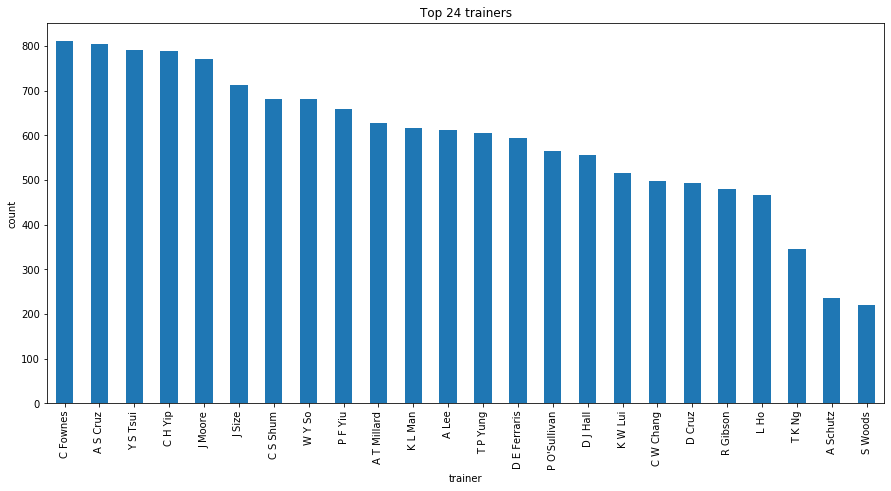

In [62]:
fig, ax1 = plt.subplots(figsize=(15,7))
ax1.set_ylabel('count')
ax1.set_title('Top 24 trainers')
results.groupby(['trainer']).size().sort_values(ascending=False).head(24).plot.bar()

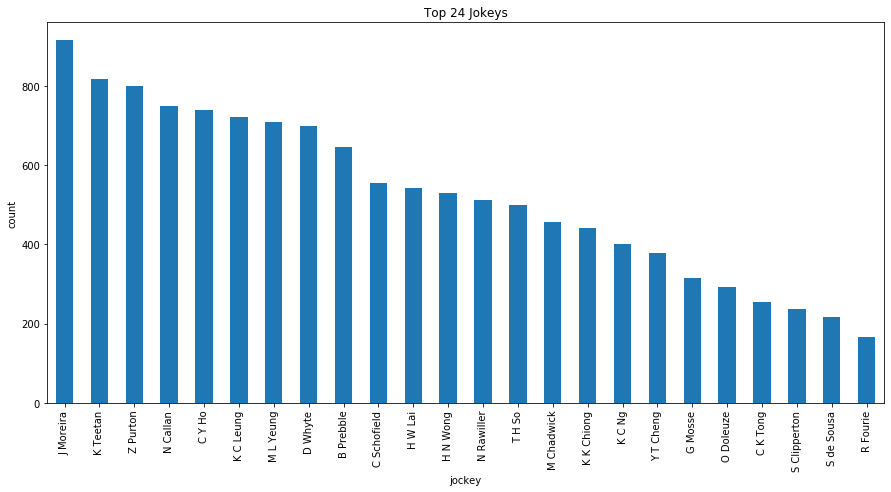

In [65]:
fig, ax1 = plt.subplots(figsize=(15,7))
ax1.set_ylabel('count')
ax1.set_title('Top 24 Jokeys')
results.groupby(['jockey']).size().sort_values(ascending=False).head(24).plot.bar()

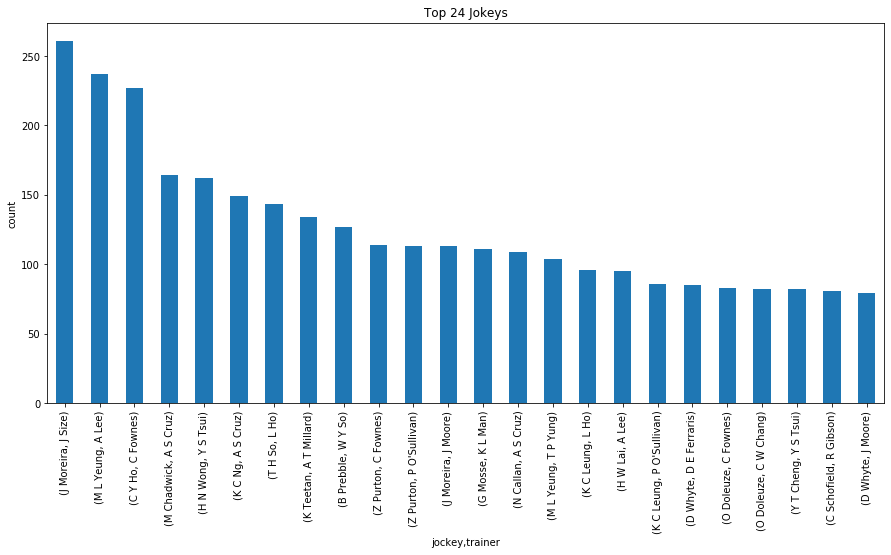

In [66]:
fig, ax1 = plt.subplots(figsize=(15,7))
ax1.set_ylabel('count')
ax1.set_title('Top 24 Jokeys Trainer pairs')
results.groupby(['jockey','trainer']).size().sort_values(ascending=False).head(24).plot.bar()

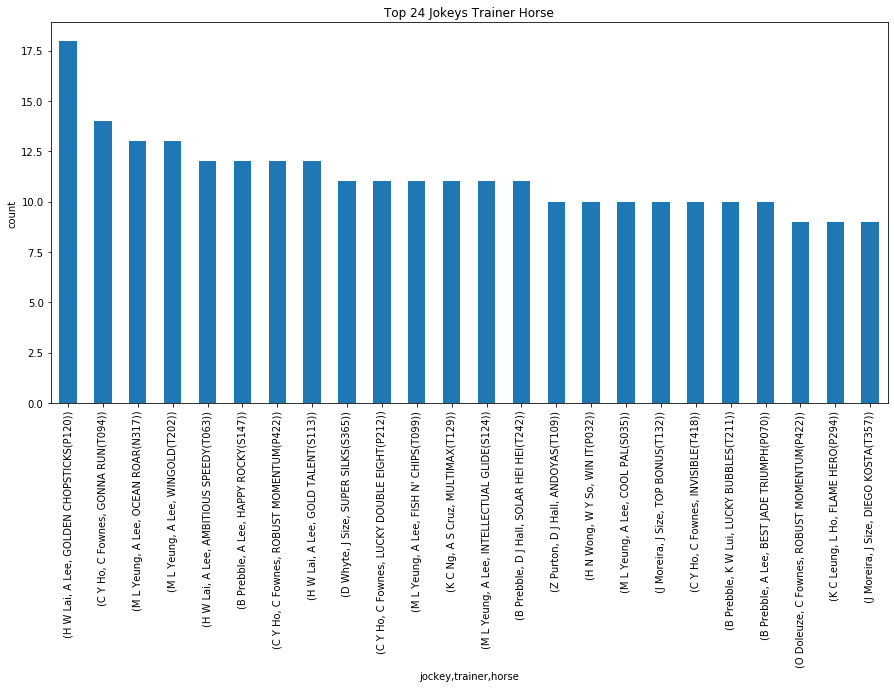

In [74]:
fig, ax1 = plt.subplots(figsize=(15,7))
ax1.set_ylabel('count')
ax1.set_title('Top 24 Jokeys Trainer Horse')
results.groupby(['jockey','trainer','horse']).size().sort_values(ascending=False).head(24).plot.bar()

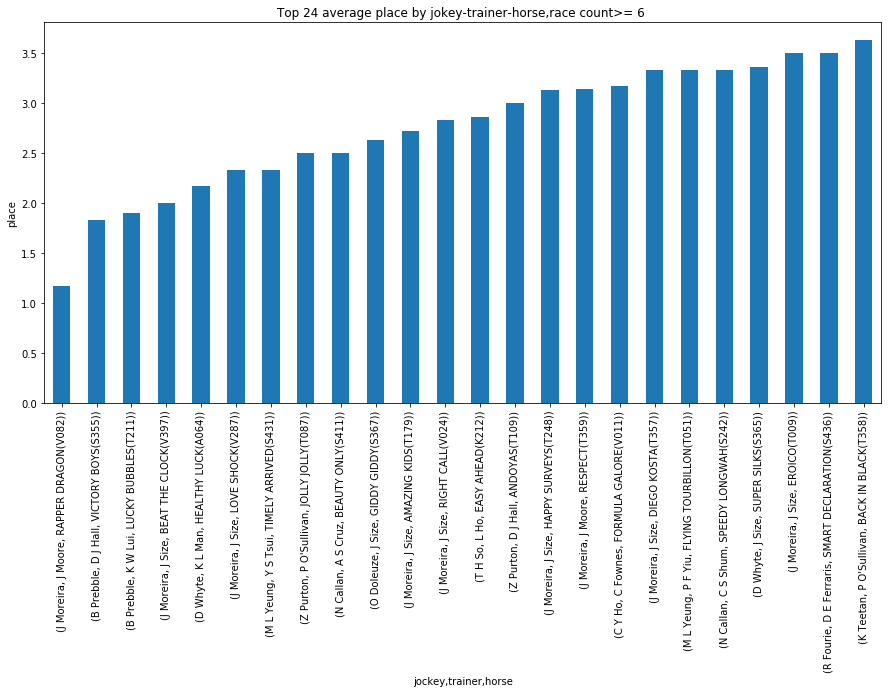

In [161]:
# jockey,trainer, horse avg place getting 
results.groupby(['jockey','trainer','horse'])['plc']

temporary_results= results[results['plc'].notna()][results[results['plc'].notna()]['plc'].apply(lambda x: x.isnumeric())].copy()
temp = temporary_results.groupby(['jockey','trainer','horse']).filter(lambda x: len(x)>=6).copy()

temp['plc'] = temp['plc'].apply(lambda x: int(x))
fig, ax1 = plt.subplots(figsize=(15,7))
ax1.set_ylabel('place')
ax1.set_title('Top 24 average place by jokey-trainer-horse,race count>= 6 ')
temp.groupby(['jockey','trainer','horse'])['plc'].mean().sort_values(ascending=True).head(24).plot.bar()


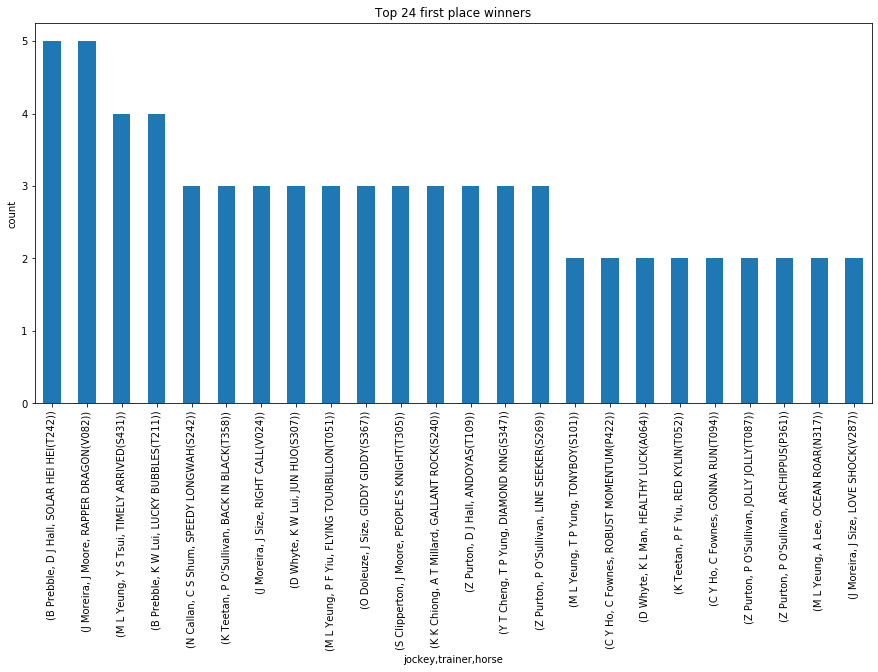

In [169]:
fig, ax1 = plt.subplots(figsize=(15,7))
ax1.set_ylabel('count')
ax1.set_title('Top 24 first place winners')
temp[temp['plc']==1].groupby(['jockey','trainer','horse']).size().sort_values(ascending=False).head(24).plot.bar()

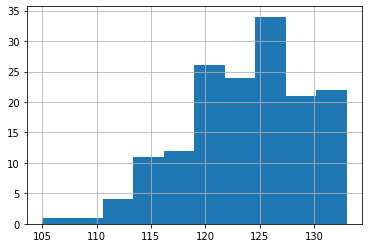

In [171]:
temp[temp['plc']==1]['actualwt'].hist()

In [ ]:
temp[temp['plc']==1]['actualwt'].hist()

## Extracting horse code from the horse name

## Import horse info file

In [36]:
horse_info = pd.read_csv('horse_info.csv', index_col = 0)

horse_info.head()

,horse,country,trainer,colour,sex,owner,import_type,current_rating,start_rating,sire,dam,age
0,()(S259),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(C368),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A BEAUTIFUL(T421),AUS,W Y So,Bay,Gelding,Sandia Yit Lau Ying Lam & Yit Kwok Leung,PP,64.0,58.0,Bushranger,Anfield,6.0
3,A FAST ONE(S424),AUS,D E Ferraris,Bay,Gelding,Samson Yip Yan Tion & David Vrijmoed,PPG,37.0,40.0,Holy Roman Emperor,Detail,6.0
4,A SHIN HIKARI(V614),JPN,NaN,Grey,Horse,Eishindo Co Ltd,VIS,NaN,NaN,Deep Impact,Catalina,NaN


## Extracting horse code from the horse name

In [37]:
horse_info['horse_code'] = horse_info['horse'].apply(lambda x: extract_horse_code(pattern, x))
horse_info.head()

,horse,country,trainer,colour,sex,owner,import_type,current_rating,start_rating,sire,dam,age,horse_code
0,()(S259),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S259
1,(C368),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C368
2,A BEAUTIFUL(T421),AUS,W Y So,Bay,Gelding,Sandia Yit Lau Ying Lam & Yit Kwok Leung,PP,64.0,58.0,Bushranger,Anfield,6.0,T421
3,A FAST ONE(S424),AUS,D E Ferraris,Bay,Gelding,Samson Yip Yan Tion & David Vrijmoed,PPG,37.0,40.0,Holy Roman Emperor,Detail,6.0,S424
4,A SHIN HIKARI(V614),JPN,NaN,Grey,Horse,Eishindo Co Ltd,VIS,NaN,NaN,Deep Impact,Catalina,NaN,V614


In [7]:
len(set(horse_info['horse_code']).intersection(set(results['horse_code'])))

1790

In [8]:
len(set(horse_info['horse_code']))

3935

In [9]:
len(set(results['horse_code']))

1807

Text(0, 0.5, 'country')

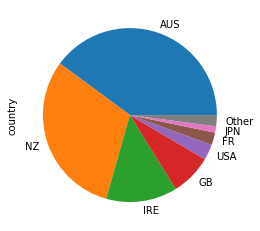

In [201]:
countries = horse_info.groupby('country').size().sort_values(ascending=False)
otherssum = countries[7:].sum()
countries = countries[0:7]
countries['Other'] = otherssum
countries_plot = countries.plot.pie(y='country')
countries_plot.set_ylabel('country')

Text(0, 0.5, 'sex')

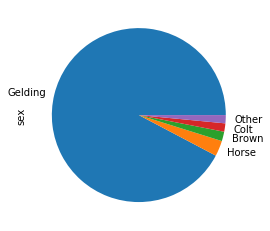

In [208]:
horsegender = horse_info.groupby('sex').size().sort_values(ascending=False)
sexothersum = horsegender[4:].sum()
horsegender = horsegender[0:4]
horsegender['Other'] = sexothersum
sex_plot = horsegender.plot.pie(y='sex')
sex_plot.set_ylabel('sex')

Text(0, 0.5, 'colour')

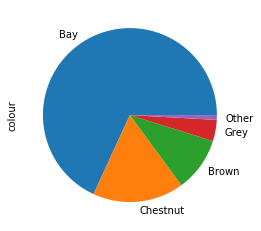

In [213]:
colour = horse_info.groupby('colour').size().sort_values(ascending=False)
colourothersum = colour[4:].sum()
colour = colour[0:4]
colour['Other'] = colourothersum
sex_plot = colour.plot.pie(y='colour')
sex_plot.set_ylabel('colour')

#### Merge result and horse info together using horse code

In [10]:
result_merged = pd.merge(results, horse_info, left_on = 'horse_code', right_on = 'horse_code', suffixes=('', '_2'))

result_merged.head()

,row,plc,horseno,horse,jockey,trainer,actualwt,declarwt,draw,lbw,runningpos,finishtime,winodds,date,raceno,class,distance,going,handicap,course,stake,venue,horse_ch,jockey_ch,trainer_ch,class_ch,going_ch,handicap_ch,course_ch,venue_ch,horse_code,horse_2,country,trainer_2,colour,sex,owner,import_type,current_rating,start_rating,sire,dam,age
0,0,1,10.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,119.0,1037.0,1.0,-,4 3 1,1.10.19,3.5,2015-06-03,1,5,1200,GOOD TO FIRM,MOUNT BUTLER HANDICAP,TURF - A COURSE,575000,Happy Valley,威百利(S243),何澤堯,方嘉柏,1,好地至快地,畢拿山讓賽,草地 - A 賽道,跑馬地,S243,NATURAL EIGHT(S243),NZ,NaN,Bay,Gelding,Lionel Chan Man Yan,PPG,NaN,NaN,Testa Rossa,Wolfmother,NaN
1,5,6,5.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,124.0,1059.0,4.0,1-3/4,3 4 6,1.11.29,4.8,2015-09-16,1,5,1200,GOOD,CHEUNG HONG HANDICAP,TURF - B COURSE,600000,Happy Valley,威百利(S243),何澤堯,方嘉柏,1,好地,長康讓賽,草地 - B 賽道,跑馬地,S243,NATURAL EIGHT(S243),NZ,NaN,Bay,Gelding,Lionel Chan Man Yan,PPG,NaN,NaN,Testa Rossa,Wolfmother,NaN
2,5,6,5.0,NATURAL EIGHT(S243),Z Purton,C Fownes,127.0,1036.0,7.0,7,6 5 6,1.10.90,10.0,2015-07-08,2,5,1200,GOOD TO FIRM,THE KING HANDICAP,TURF - A COURSE,575000,Happy Valley,威百利(S243),潘頓,方嘉柏,1,好地至快地,馬中之王讓賽,草地 - A 賽道,跑馬地,S243,NATURAL EIGHT(S243),NZ,NaN,Bay,Gelding,Lionel Chan Man Yan,PPG,NaN,NaN,Testa Rossa,Wolfmother,NaN
3,8,9,4.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,131.0,1053.0,4.0,5-1/2,7 8 9,1.11.39,10.0,2015-11-14,1,5,1200,GOOD,PANASONIC DRIVING VIDEO RECORDER HANDICAP,TURF - A+3 COURSE,600000,Sha Tin,威百利(S243),何澤堯,方嘉柏,1,好地,ＰＡＮＡＳＯＮＩＣ路路亨通行車記錄器讓賽,草地 - A+3 賽道,沙田,S243,NATURAL EIGHT(S243),NZ,NaN,Bay,Gelding,Lionel Chan Man Yan,PPG,NaN,NaN,Testa Rossa,Wolfmother,NaN
4,8,9,3.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,129.0,1045.0,1.0,4-1/4,3 4 9,1.11.27,7.1,2016-01-06,1,5,1200,GOOD,PATERSON HANDICAP,TURF - A COURSE,600000,Happy Valley,威百利(S243),何澤堯,方嘉柏,1,好地,百德新讓賽,草地 - A 賽道,跑馬地,S243,NATURAL EIGHT(S243),NZ,NaN,Bay,Gelding,Lionel Chan Man Yan,PPG,NaN,NaN,Testa Rossa,Wolfmother,NaN


## Import trackwork file

In [90]:
trackwork = pd.read_csv('horse-racing-dataset-for-experts-hong-kong/trackwork.csv', index_col = 0)

trackwork.head(10)

,horse,horse_code,date,type,track,workouts,gear
0,A BEAUTIFUL,T421,2015-07-20,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
1,A BEAUTIFUL,T421,2015-07-21,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
2,A BEAUTIFUL,T421,2015-07-22,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
3,A BEAUTIFUL,T421,2015-07-23,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
4,A BEAUTIFUL,T421,2015-07-24,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
5,A BEAUTIFUL,T421,2015-07-25,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
6,A BEAUTIFUL,T421,2015-07-26,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
7,A BEAUTIFUL,T421,2015-07-27,Trotting,Sha TinSmT,SmT 1 Round - Fast (R.B.),NaN
8,A BEAUTIFUL,T421,2015-07-28,Trotting,Sha TinSmT,SmT 1 Round - Fast (R.B.),NaN
9,A BEAUTIFUL,T421,2015-07-29,Trotting,Sha TinSmT,SmT 1 Round - Fast (R.B.),NaN


In [96]:
trackwork[trackwork['horse_code'] == 'T421'].head(20)

# results[(results['horse_code'] == 'T421')].head(20)

,horse,horse_code,date,type,track,workouts,gear
0,A BEAUTIFUL,T421,2015-07-20,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
1,A BEAUTIFUL,T421,2015-07-21,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
2,A BEAUTIFUL,T421,2015-07-22,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
3,A BEAUTIFUL,T421,2015-07-23,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
4,A BEAUTIFUL,T421,2015-07-24,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
5,A BEAUTIFUL,T421,2015-07-25,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
6,A BEAUTIFUL,T421,2015-07-26,Trotting,Sha TinTroR,TroR Canter (R.B.),NaN
7,A BEAUTIFUL,T421,2015-07-27,Trotting,Sha TinSmT,SmT 1 Round - Fast (R.B.),NaN
8,A BEAUTIFUL,T421,2015-07-28,Trotting,Sha TinSmT,SmT 1 Round - Fast (R.B.),NaN
9,A BEAUTIFUL,T421,2015-07-29,Trotting,Sha TinSmT,SmT 1 Round - Fast (R.B.),NaN


## Import barrier file

In [97]:
barrier = pd.read_csv('horse-racing-dataset-for-experts-hong-kong/barrier.csv', index_col = 0)

barrier = barrier[['plc', 'horse', 'jockey', 'trainer', 'draw', 'gear', 'lbw',
       'runningpos', 'time', 'comment', 'date', 'distance', 'going', 'raceno',
       'venue', 'course', 'result']]

barrier.head()

,plc,horse,jockey,trainer,draw,gear,lbw,runningpos,time,comment,date,distance,going,raceno,venue,course,result
0,5,A BEAUTIFUL(T421),B Prebble,W Y So,1.0,NaN,4-3/4L,7 7 5,0.57.93,Ran on ok when asked late.,2015-09-22,1000,GOOD,1,SHA TIN,TURF,Passed
1,3,A BEAUTIFUL(T421),B Prebble,W Y So,6.0,NaN,5-3/4L,5 5 3,1.02.95,Slow to begin; made progress by saving ground ...,2015-10-09,200,GOOD,12,SHA TIN,TURF,Passed
2,10,A BEAUTIFUL(T421),B Prebble,W Y So,10.0,NaN,3-1/4L,8 8 10,1.02.26,Ran on ordinary when asked at 200m.,2015-09-08,200,GOOD,4,SHA TIN,ALL WEATHER TRACK,Failed
3,9,A BEAUTIFUL(T421),H N Wong,W Y So,1.0,H,10-3/4L,5 4 9,1.11.72,Raced along the rail; flattened late.,2015-12-15,1200,GOOD,2,SHA TIN,ALL WEATHER TRACK,NaN
4,3,A BEAUTIFUL(T421),H W Lai,W Y So,4.0,B,2-1/4L,7 4 3,1.02.28,Wide at turn; came home strong for 3rd.,2016-06-03,1050,GOOD,3,SHA TIN,ALL WEATHER TRACK,Passed


In [101]:
barrier.groupby(['date','venue','course','raceno']).size().reset_index()

,date,venue,course,raceno,0
0,2015-06-02,SHA TIN,TURF,1,9
1,2015-06-02,SHA TIN,TURF,2,6
2,2015-06-02,SHA TIN,TURF,3,7
3,2015-06-02,SHA TIN,TURF,4,8
4,2015-06-05,SHA TIN,ALL WEATHER TRACK,1,10
...,...,...,...,...,...
1019,2017-07-07,SHA TIN,ALL WEATHER TRACK,1,7
1020,2017-07-07,SHA TIN,ALL WEATHER TRACK,2,8
1021,2017-07-07,SHA TIN,ALL WEATHER TRACK,3,6
1022,2017-07-11,SHA TIN,ALL WEATHER TRACK,1,9


In [102]:
barrier[(barrier['raceno'] == 1) & (barrier['course'] == 'TURF') & (barrier['date'] == '2015-06-02')]

,plc,horse,jockey,trainer,draw,gear,lbw,runningpos,time,comment,date,distance,going,raceno,venue,course,result
27,2,ABLE FRIEND(P303),J Moreira,J Moore,9.0,CP,SH,8 8 8 2,1.37.74,Taken back early; ran on well without being as...,2015-06-02,1600,GOOD,1,SHA TIN,TURF,NaN
4859,4,LET ME GO(P215),K Teetan,J Moore,8.0,H,1-3/4L,7 7 7 4,1.38.02,Rearward early; responded ok when asked in str...,2015-06-02,1600,GOOD,1,SHA TIN,TURF,NaN
5140,8,LUCKY PLACE(T004),N Rawiller,W Y So,4.0,H,10L,3 3 3 8,1.39.35,On-pace early; weakened in straight.,2015-06-02,1600,GOOD,1,SHA TIN,TURF,NaN
5678,7,MR GINGER(N307),Z Purton,C Fownes,2.0,NaN,7-1/2L,2 2 2 7,1.38.92,In touch early; had a hold in straight.,2015-06-02,1600,GOOD,1,SHA TIN,TURF,NaN
6161,1,PACKING LLAREGYB(S109),M L Yeung,A Schutz,7.0,H/SR,NaN,5 5 5 1,1.37.73,Midfield early; quickened well when cleared in...,2015-06-02,1600,GOOD,1,SHA TIN,TURF,NaN
6520,9,PRINCE FALCON(T144),C W Wong,J Moore,3.0,NaN,NaN,Withdrawn,NaN,NaN,2015-06-02,1600,GOOD,1,SHA TIN,TURF,NaN
6959,3,ROMANTIC TOUCH(S393),B Prebble,T P Yung,6.0,NaN,Head,6 6 6 3,1.37.76,Eased early; dashed well for place.,2015-06-02,1600,GOOD,1,SHA TIN,TURF,NaN
7871,5,SUNNY YING(P152),K C Leung,J Moore,1.0,B,3-1/4L,1 1 1 5,1.38.27,Led early; flattened late.,2015-06-02,1600,GOOD,1,SHA TIN,TURF,Passed
8102,6,SYSTEM OVERLOAD(T115),D Lane,D J Hall,5.0,NaN,3-1/2L,4 4 4 6,1.38.28,Raced midfield under a hold; ran on ok.,2015-06-02,1600,GOOD,1,SHA TIN,TURF,NaN


In [98]:
barrier[(barrier['raceno'] == 1) & (barrier['horse'] == 'YOUNG RANGER(S435)')]

,plc,horse,jockey,trainer,draw,gear,lbw,runningpos,time,comment,date,distance,going,raceno,venue,course,result
9186,1,YOUNG RANGER(S435),A Badel,C S Shum,7.0,B,NaN,4 1 1 1,1.49.84,Hit the front at 1000m; kept on in the Straigh...,2017-01-21,1700,GOOD,1,HAPPY VALLEY,TURF,NaN
9189,3,YOUNG RANGER(S435),K C Leung,C S Shum,2.0,B,3-1/4L,4 3 3,1.10.91,Up with the pace; not fully tested.,2016-02-05,1200,GOOD,1,SHA TIN,ALL WEATHER TRACK,NaN
9191,7,YOUNG RANGER(S435),K K Chiong,C S Shum,4.0,B,5-3/4L,2 4 7,1.10.83,On-pace early; found nothing when asked.,2016-05-13,1200,GOOD,1,SHA TIN,ALL WEATHER TRACK,Passed
9194,1,YOUNG RANGER(S435),N Rawiller,C S Shum,7.0,B,NaN,1 1 1 1,1.51.54,Led early; kept on well to score.,2017-03-04,1700,GOOD,1,HAPPY VALLEY,TURF,NaN


## Import comment file

In [86]:
comments = pd.read_csv('horse-racing-dataset-for-experts-hong-kong/comments.csv', index_col = 0)

comments = comments[['date','raceno','plc','horseno','gear','comment']]

comments.head(11)

,date,raceno,plc,horseno,gear,comment
0,2015-06-03,1,11,1,B/H,"Ridden along from the middle gate, gained a sp..."
1,2015-06-03,1,4,2,SR/TT,"Settled at the back from the widest gate, save..."
2,2015-06-03,1,7,3,B2/TT,"Settled in last few from a poor draw, widest r..."
3,2015-06-03,1,6,5,--,"Broke well, gradually taken back just off the ..."
4,2015-06-03,1,3,6,--,"Broke well before settling in midfield, switch..."
5,2015-06-03,1,5,7,B/SR,"Settled in rear of midfield on rails, clipped ..."
6,2015-06-03,1,8,8,CP/H/TT,"Began fairly, settled 3-wide in rear of midfie..."
7,2015-06-03,1,9,9,B,Travelled in a prominent position 3-wide witho...
8,2015-06-03,1,1,10,B/H,"Settled just off the pace on rails, soon came ..."
9,2015-06-03,1,10,11,PC/TT,Never seen with a chance. ...


## Perform VaderSentiment Analysis to get score on comment

In [87]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

def sentiment_scores(sentence): 
  
    sid_obj = SentimentIntensityAnalyzer() 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    
#     print("Overall sentiment dictionary is : ", sentiment_dict) 
#     print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
#     print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
#     print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 
  
#     print("Sentence Overall Rated As", end = " ") 
  
#     if sentiment_dict['compound'] >= 0.05 : 
#         print("Positive") 
  
#     elif sentiment_dict['compound'] <= - 0.05 : 
#         print("Negative") 
  
#     else : 
#         print("Neutral") 
        
    return sentiment_dict['compound']

In [88]:
comments['comment_score'] = comments['comment'].apply(lambda x: sentiment_scores(x))
comments.head()

,date,raceno,plc,horseno,gear,comment,comment_score
0,2015-06-03,1,11,1,B/H,"Ridden along from the middle gate, gained a sp...",-0.2263
1,2015-06-03,1,4,2,SR/TT,"Settled at the back from the widest gate, save...",0.3612
2,2015-06-03,1,7,3,B2/TT,"Settled in last few from a poor draw, widest r...",-0.2960
3,2015-06-03,1,6,5,--,"Broke well, gradually taken back just off the ...",-0.3289
4,2015-06-03,1,3,6,--,"Broke well before settling in midfield, switch...",0.6219
